# Set up

In [1]:
SAMPLE100 = False

## (You can run all), but must specify the embedding model first

In [2]:
EMBEDDING_MODEL = 'sentence-transformers/all-mpnet-base-v2'
# EMBEDDING_MODEL = 'sentence-transformers/all-MiniLM-L6-v2'

## Install and Clone Repo

In [3]:
%cd /content

/content


In [4]:
!pip install sentence_transformers --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 60.7 MB/s eta 0:00:00


In [5]:
# !pip install faiss-gpu
!pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 20.8 MB/s eta 0:00:00


In [6]:
!git clone https://github.com/nhatkhangcs/Nomnom-model.git

Cloning into 'Nomnom-model'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 85 (delta 29), reused 68 (delta 19), pack-reused 0
Receiving objects: 100% (85/85), 525.10 KiB | 1.27 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [7]:
# Download csv
!gdown 1KzcPWNRud2nlpZ41TMRew-gsLJM92sRF -O Nomnom-model/scripts/data/data.csv
!gdown 1i3eT_VF6yA_G4GvlAsehwSeIQmzXzn40 -O Nomnom-model/scripts/data/RAW_recipes.csv
!gdown 1eIz2a44a173XzYy2q098V0htpJ8rKB1w -O Nomnom-model/scripts/data/RAW_interactions.csv
!gdown 1BMg1Ooto2FazBjvF5KFDPKXcjOkZ7iSK -O Nomnom-model/scripts/data/PP_users.csv

Downloading...
From (original): https://drive.google.com/uc?id=1KzcPWNRud2nlpZ41TMRew-gsLJM92sRF
From (redirected): https://drive.google.com/uc?id=1KzcPWNRud2nlpZ41TMRew-gsLJM92sRF&confirm=t&uuid=fea73c2d-bad1-4aff-b7a5-7c245b5fbb79
To: /content/Nomnom-model/scripts/data/data.csv
100% 190M/190M [00:03<00:00, 49.3MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1i3eT_VF6yA_G4GvlAsehwSeIQmzXzn40
From (redirected): https://drive.google.com/uc?id=1i3eT_VF6yA_G4GvlAsehwSeIQmzXzn40&confirm=t&uuid=f3502a53-3005-4d27-b2ec-1128627ae42f
To: /content/Nomnom-model/scripts/data/RAW_recipes.csv
100% 295M/295M [00:05<00:00, 53.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1eIz2a44a173XzYy2q098V0htpJ8rKB1w
From (redirected): https://drive.google.com/uc?id=1eIz2a44a173XzYy2q098V0htpJ8rKB1w&confirm=t&uuid=203644a0-863b-4c0a-b3c1-dbde233d4cdb
To: /content/Nomnom-model/scripts/data/RAW_interactions.csv
100% 349M/349M [00:05<00:00, 68.0MB/s]
Downloading...
From: 

In [8]:
# Download embedded vector file
if EMBEDDING_MODEL == 'sentence-transformers/all-mpnet-base-v2':
    !gdown 1Zj9b0U3XN3AcICsMra1poBFcx1UHCy66 -O Nomnom-model/scripts/data/embedded_names.pkl
    !gdown 1-4-X3pQTxRuhAW2-KRyc8nhyRfKV4cc7 -O Nomnom-model/scripts/data/embedded_ingredients.pkl
    !gdown 1-1aDI6ZKvVLZxmbBc01gP_FFSWj_tUzQ -O Nomnom-model/scripts/data/embedded_tags.pkl

elif EMBEDDING_MODEL == 'sentence-transformers/all-MiniLM-L6-v2':
    !gdown 1-7p4bHR2IAWAaZHbaRS-IUYWb1TMsvWS -O Nomnom-model/scripts/data/embedded_names.pkl
    !gdown 1-6Rvib4upv9VHEl1nwB2-D1SczbTieD2 -O Nomnom-model/scripts/data/embedded_ingredients.pkl
    !gdown 1yZQi3gWc90xGwXDvwvuTTMGbzzzkl1Gc -O Nomnom-model/scripts/data/embedded_tags.pkl

else:
    raise Exception("Embedding model not supported")

Downloading...
From (original): https://drive.google.com/uc?id=1Zj9b0U3XN3AcICsMra1poBFcx1UHCy66
From (redirected): https://drive.google.com/uc?id=1Zj9b0U3XN3AcICsMra1poBFcx1UHCy66&confirm=t&uuid=2e19f176-e6b2-417a-856f-9f9909a4a040
To: /content/Nomnom-model/scripts/data/embedded_names.pkl
100% 712M/712M [00:11<00:00, 61.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-4-X3pQTxRuhAW2-KRyc8nhyRfKV4cc7
From (redirected): https://drive.google.com/uc?id=1-4-X3pQTxRuhAW2-KRyc8nhyRfKV4cc7&confirm=t&uuid=1568354a-18b0-4090-b52e-24233145487b
To: /content/Nomnom-model/scripts/data/embedded_ingredients.pkl
100% 712M/712M [00:10<00:00, 68.2MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-1aDI6ZKvVLZxmbBc01gP_FFSWj_tUzQ
From (redirected): https://drive.google.com/uc?id=1-1aDI6ZKvVLZxmbBc01gP_FFSWj_tUzQ&confirm=t&uuid=6234d6a7-36b0-4de1-8396-72675d00b118
To: /content/Nomnom-model/scripts/data/embedded_tags.pkl
100% 712M/712M [00:15<00:00, 46.4MB/s]


In [9]:
%cd Nomnom-model/scripts

/content/Nomnom-model/scripts


In [10]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import pickle
import os
import faiss
import ast
import time

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


## Create model class

In [11]:
class SearchModel():
    def __init__(self, nutritions_scaler=None):
        self.data = {}
        self.weights = [1.0, 1.0, 1.0, 1.0]
        self.weights_rating = 1.0
        self.embedding_model = SentenceTransformer(EMBEDDING_MODEL)
        self.index_for_name = None # Index is the model by faiss
        self.index_for_tags = None
        self.index_for_ingredients = None
        self.index_for_nutrition = None
        self.scaler = nutritions_scaler
        self.NUTRITIONS = ['calories', 'fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']

    def embed(self, sentences):
        '''
            sentences: list of strings
            return: list of embeddings
        '''
        return self.embedding_model.encode(sentences)

    def fit_name(self, embeddings):
        print('[+] Fitting names...')
        norms = np.linalg.norm(embeddings, axis=1, keepdims=True)
        embeddings = embeddings / norms
        self.index_for_name = faiss.IndexFlatIP(embeddings.shape[1])  # IndexFlatIP for inner product (cosine similarity)
        self.index_for_name.add(embeddings)

    def fit_tag(self, embeddings):
        print('[+] Fitting tags...')
        norms = np.linalg.norm(embeddings, axis=1, keepdims=True)
        embeddings = embeddings / norms
        self.index_for_tags = faiss.IndexFlatIP(embeddings.shape[1])  # IndexFlatIP for inner product (cosine similarity)
        self.index_for_tags.add(embeddings)

    def fit_ingredients(self, embeddings):
        print('[+] Fitting ingredients...')
        norms = np.linalg.norm(embeddings, axis=1, keepdims=True)
        embeddings = embeddings / norms
        self.index_for_ingredients = faiss.IndexFlatIP(embeddings.shape[1])  # IndexFlatIP for inner product (cosine similarity)
        self.index_for_ingredients.add(embeddings)

    def fit_nutrition(self, nutrition):
        print('[+] Fitiing nutrition...')
        nutrition = np.ascontiguousarray(nutrition, dtype=np.float32)
        self.index_for_nutrition = faiss.IndexFlatL2(7)  # IndexFlatL2 for L2 distance (Euclidean)
        self.index_for_nutrition.add(nutrition)

    def fit(self, embedded_names, embedded_tags, embedded_ingredients, nutritions_scaled):
        self.fit_name(embedded_names)
        self.fit_tag(embedded_tags)
        self.fit_ingredients(embedded_ingredients)
        self.fit_nutrition(nutritions_scaled)
        print('[++++] DONE')

    def load(self, data):
        '''
            data: dataframe
        '''
        print('[+] Loading data into model...')
        self.data = data
        print('[+] DONE')

    def search(self, name: str=None, tags: str=None, ingredients: str=None, nutrition: list[float]=None, k=1000):
        '''
            return: list of similar
        '''
        print('[+] Retrieving similar foods...')
        final_res = {}
        if name:
            embedded_name = self.embedding_model.encode(name)
            name_scores, name_indices = self.index_for_name.search(embedded_name.reshape(1, -1), k=k)
            for i, idx in enumerate(name_indices[0]):
                if idx not in final_res:
                    final_res[idx] = {}
                final_res[idx]['name'] = name_scores[0][i] * self.weights[0]

        if tags:
            embedded_tags = self.embedding_model.encode(tags)
            tags_scores, tags_indices = self.index_for_tags.search(embedded_tags.reshape(1, -1), k=k)
            for i, idx in enumerate(tags_indices[0]):
                if idx not in final_res:
                    final_res[idx] = {}
                final_res[idx]['tags'] = tags_scores[0][i] * self.weights[1]

        if ingredients:
            embedded_ingredients = self.embedding_model.encode(ingredients)
            ingredients_scores, ingredients_indices = self.index_for_ingredients.search(embedded_ingredients.reshape(1, -1), k=k)
            for i, idx in enumerate(ingredients_indices[0]):
                if idx not in final_res:
                    final_res[idx] = {}
                final_res[idx]['ingredients'] = ingredients_scores[0][i] * self.weights[2]

        if nutrition:
            scaled_nutrition = np.array(nutrition).reshape(1, -1)
            scaled_nutrition = self.scaler.transform(scaled_nutrition)
            nutrition_scores, nutrition_indices = self.index_for_nutrition.search(scaled_nutrition.reshape(1, -1), k=k)
            max_nutrition_scores = max(nutrition_scores[0])
            normalized_nutrition_scores = [1 - score/max_nutrition_scores for score in nutrition_scores[0]]
            for i, idx in enumerate(nutrition_indices[0]):
                if idx not in final_res:
                    final_res[idx] = {}
                final_res[idx]['nutrition'] = normalized_nutrition_scores[i] * self.weights[3]

        final_list = [
            (idx, sum([score for crit, score in scores.items()])) for idx, scores in final_res.items()
        ]
        print(len(final_list))

        return [(self.data.iloc[idx], score) for idx, score in sorted(final_list, key=lambda x: x[1], reverse=True)]


In [12]:
class BetterSearchModel(SearchModel):
    def search(self, name: str=None, tags: list[str]=None, ingredients: list[str]=None, nutrition: list[float]=None, k=1000, must_have_tags=False, must_have_all_tags=False, rating_important=False, verbose=True):
        '''
            return: list of similar
        '''
        if verbose:
            print('[+] Retrieving similar foods...')
        final_res = {}
        n_params = 0
        if name is not None:
            n_params += 1
            embedded_name = self.embedding_model.encode(name).reshape(1, -1)
            norms = np.linalg.norm(embedded_name, axis=1, keepdims=True)
            embedded_name = embedded_name / norms
            name_scores, name_indices = self.index_for_name.search(embedded_name.reshape(1, -1), k=k)
            for i, idx in enumerate(name_indices[0]):
                if idx not in final_res:
                    final_res[idx] = {}
                final_res[idx]['name'] = name_scores[0][i] * self.weights[0]

        if tags is not None:
            n_params += 1
            concat_tags = ' '.join(tags)

            embedded_tags = self.embedding_model.encode(concat_tags).reshape(1, -1)
            norms = np.linalg.norm(embedded_tags, axis=1, keepdims=True)
            embedded_tags = embedded_tags / norms
            tags_scores, tags_indices = self.index_for_tags.search(embedded_tags.reshape(1, -1), k=k)
            for i, idx in enumerate(tags_indices[0]):
                if idx not in final_res:
                    final_res[idx] = {}
                final_res[idx]['tags'] = tags_scores[0][i] * self.weights[1]

        if ingredients is not None:
            n_params += 1
            concat_ingredients = ', '.join(ingredients)

            embedded_ingredients = self.embedding_model.encode(concat_ingredients).reshape(1, -1)
            norms = np.linalg.norm(embedded_ingredients, axis=1, keepdims=True)
            embedded_ingredients = embedded_ingredients / norms
            ingredients_scores, ingredients_indices = self.index_for_ingredients.search(embedded_ingredients.reshape(1, -1), k=k)
            for i, idx in enumerate(ingredients_indices[0]):
                if idx not in final_res:
                    final_res[idx] = {}
                final_res[idx]['ingredients'] = ingredients_scores[0][i] * self.weights[2]

        if nutrition is not None:
            n_params += 1
            nutrition = np.array(nutrition).reshape(1, -1)
            scaled_nutrition = self.scaler.transform(nutrition)

            nutrition_scores, nutrition_indices = self.index_for_nutrition.search(scaled_nutrition.reshape(1, -1), k=k)
            max_nutrition_scores = max(nutrition_scores[0])
            normalized_nutrition_scores = [1 - score/max_nutrition_scores for score in nutrition_scores[0]]
            for i, idx in enumerate(nutrition_indices[0]):
                if idx not in final_res:
                    final_res[idx] = {}
                final_res[idx]['nutrition'] = normalized_nutrition_scores[i] * self.weights[3]

        if not n_params:
            print(f'No field is provided')
            return None

        if SAMPLE100:
            del final_res[-1]
        scores_df = pd.DataFrame.from_dict(final_res, orient='index')

        scores_df.fillna(0, inplace=True)
        scores_df['total'] = 0

        # Update total column based on provided fields
        if name is not None:
            scores_df['total'] += scores_df.get('name', 0)
        if tags is not None:
            scores_df['total'] += scores_df.get('tags', 0)
        if ingredients is not None:
            scores_df['total'] += scores_df.get('ingredients', 0)
        if nutrition is not None:
            scores_df['total'] += scores_df.get('nutrition', 0)

        if rating_important:
            scores_df['total'] += self.data['bonus'] * self.weights_rating

        filtered_scores_df = []
        remained_scores_df = scores_df

        if verbose:
            print(f'Fields: {n_params} -> {len(scores_df)}')

        if tags and must_have_tags:
            df = self.data.loc[scores_df.index]

            if verbose:
                print(tags, len(df))

            if must_have_all_tags:
                df = df[df['tags'].apply(lambda food_tags: all(tag in food_tags for tag in tags))]
            else:
                df = df[df['tags'].apply(lambda food_tags: any(tag in food_tags for tag in tags))]

            if verbose:
                print(f"Filtered tags {'(all)' if must_have_all_tags else '(any)'} -> {len(df)}")

            filtered_scores_df = scores_df.loc[df.index]
            remained_scores_df = scores_df.loc[~scores_df.index.isin(df.index)]

            del df

            filtered_scores_df = filtered_scores_df.sort_values(by='total', ascending=False)

        remained_scores_df = remained_scores_df.sort_values(by='total', ascending=False)

        del scores_df

        res = {}

        if verbose:
            print(f"[{'+'*n_params}] DONE")

        res['df'] = pd.concat([filtered_scores_df, remained_scores_df]) if isinstance(filtered_scores_df, pd.DataFrame) else remained_scores_df

        return res

# Load data, transfer strings into python objects

In [13]:
df = pd.read_csv('data/RAW_recipes.csv')

In [14]:
if SAMPLE100:
    ids = [40893, 44394, 85009, 134728, 200236, 254596, 306785, 79222, 310237, 321038, 20930, 41090, 180132, 87750, 127155, 180705, 181765, 182985, 195132, 219118, 228530, 246902, 342209, 424415, 441096, 442352, 36144, 278406, 45119, 58758, 138839, 254859, 256416, 414099, 463367, 27551, 56494, 63426, 102025, 115534, 116953, 158118, 234171, 241335, 273416, 300405, 388283, 23259, 25749, 135021, 184649, 225171, 281529, 245936, 250609, 256397, 281620, 290180, 373842, 381108, 30968, 57562, 152122, 163370, 205218, 217012, 78274, 378032, 241799, 260554, 278119, 299530, 328012, 344072, 360603, 481622, 5139, 52968, 77021, 92154, 146401, 181978, 203281, 205357, 229263, 235064, 298595, 321792, 360683, 408997, 432469, 8846, 183729, 33205, 43611, 60876, 88682, 219882, 264015, 386706]
    indices = df.loc[df['id'].isin(ids)]
    print(indices.index)
    df = df.iloc[indices.index]  # Use indices directly without converting to a list
df.head(20)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4
6,aww marinated olives,25274,15,21730,2002-04-14,"['15-minutes-or-less', 'time-to-make', 'course...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,my italian mil was thoroughly impressed by my ...,"['fennel seeds', 'green olives', 'ripe olives'...",9
7,backyard style barbecued ribs,67888,120,10404,2003-07-30,"['weeknight', 'time-to-make', 'course', 'main-...","[1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0]",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22
8,bananas 4 ice cream pie,70971,180,102353,2003-09-10,"['weeknight', 'time-to-make', 'course', 'main-...","[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...",8,"['crumble cookies into a 9-inch pie plate , or...",NaN,"['chocolate sandwich style cookies', 'chocolat...",6
9,beat this banana bread,75452,70,15892,2003-11-04,"['weeknight', 'time-to-make', 'course', 'main-...","[2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0]",12,"['preheat oven to 350 degrees', 'butter two 9x...",from ann hodgman's,"['sugar', 'unsalted butter', 'bananas', 'eggs'...",9


In [15]:
df['name'] = df['name']
df['tags'] = df['tags'].apply(ast.literal_eval)
df['ingredients'] = df['ingredients'].apply(ast.literal_eval)
df['nutrition'] = df['nutrition'].apply(ast.literal_eval)

In [16]:
df.shape

(231637, 12)

In [17]:
NUTRITIONS = ['calories', 'fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']
# Unpack the "Nutrition" column into separate columns
df[NUTRITIONS] = pd.DataFrame(df['nutrition'].tolist(), index=df.index)
df[NUTRITIONS].head(10)

,calories,fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,352.9,1.0,337.0,23.0,3.0,0.0,28.0
5,160.2,10.0,55.0,3.0,9.0,20.0,7.0
6,380.7,53.0,7.0,24.0,6.0,24.0,6.0
7,1109.5,83.0,378.0,275.0,96.0,86.0,36.0
8,4270.8,254.0,1306.0,111.0,127.0,431.0,220.0
9,2669.3,160.0,976.0,107.0,62.0,310.0,138.0


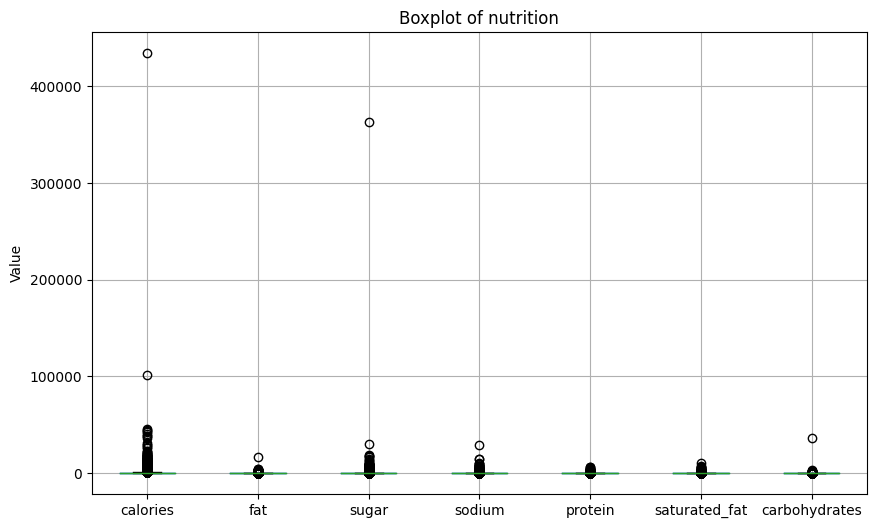

In [18]:
import matplotlib.pyplot as plt

# Create a boxplot for the selected columns
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
df[NUTRITIONS].boxplot()

# Customize the plot
plt.title('Boxplot of nutrition')
plt.ylabel('Value')

# Show the plot
plt.show()


## Remove outliers for nutrients value scaler

In [19]:
nutritions = df[NUTRITIONS]

In [20]:
# # Calculate Z-scores for each attribute
# z_scores = (nutritions - np.mean(nutritions, axis=0)) / np.std(nutritions, axis=0)

# # Define threshold for outlier detection (e.g., 3 standard deviations from the mean)
# threshold = 1

# # Find indices of outliers
# outlier_indices = np.where(np.abs(z_scores) > threshold)

# # Remove outliers
# df_cleaned = df.drop(outlier_indices[0])

# print("Original data shape:", df.shape)
# print("Cleaned data shape:", df_cleaned.shape)

In [21]:
df_cleaned = df.copy()
for column in NUTRITIONS:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

print("Original data shape:", df.shape)
print("Cleaned data shape:", df_cleaned.shape)

Original data shape: (231637, 19)
Cleaned data shape: (182397, 19)


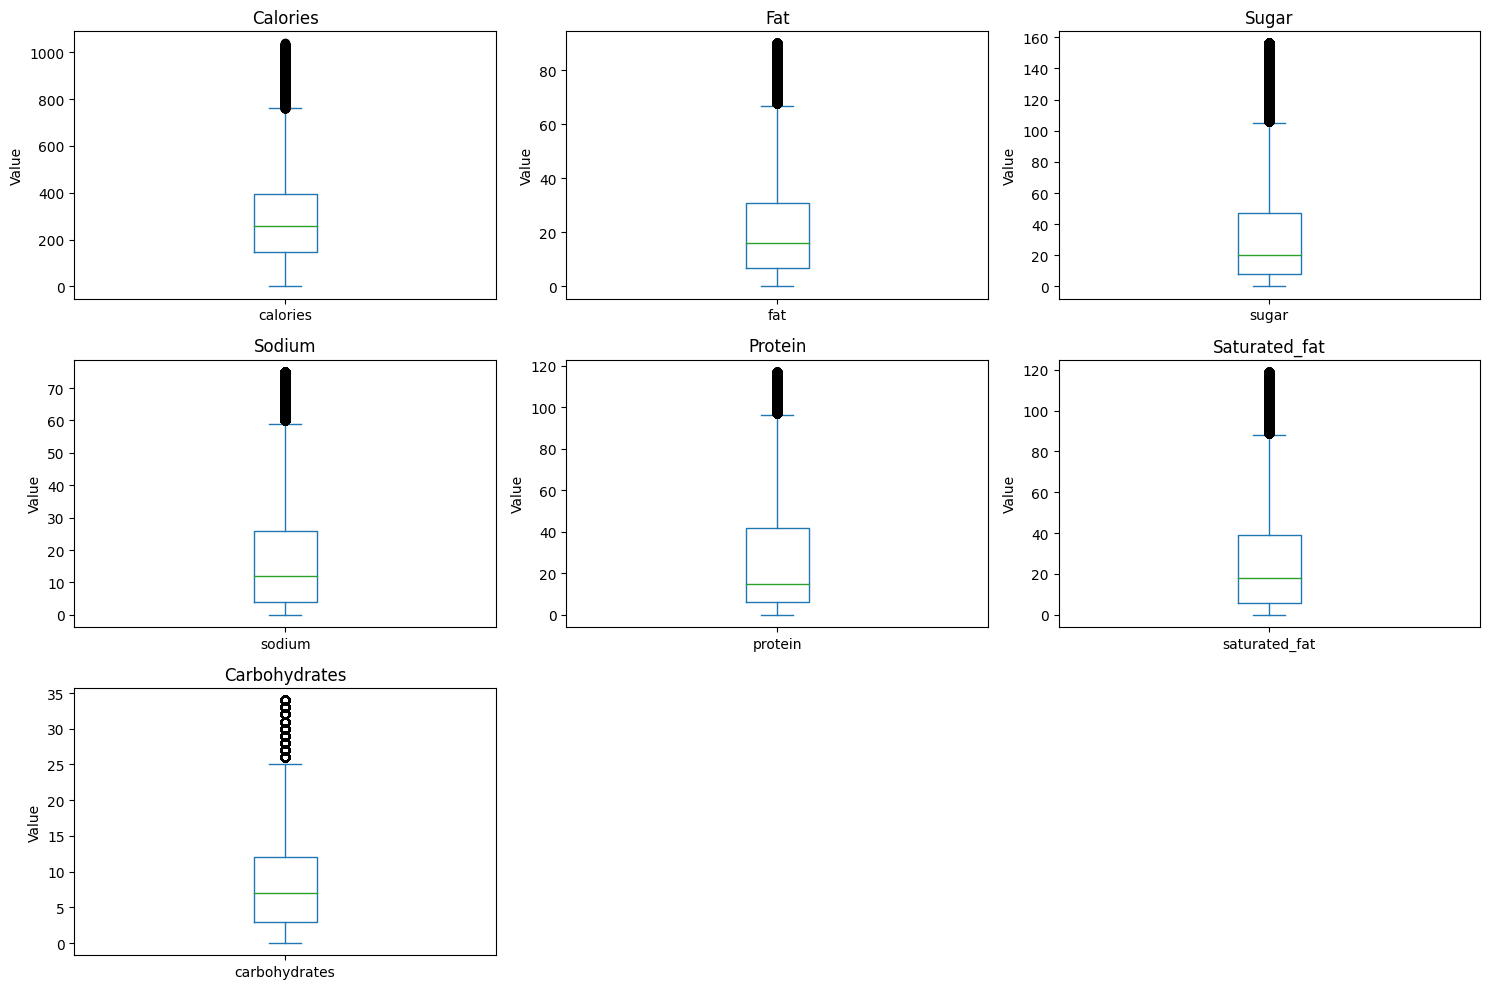

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, feature in enumerate(NUTRITIONS, 1):
    plt.subplot(3, 3, i)  # Create a subplot for each feature
    df_cleaned[feature].plot(kind='box')
    plt.title(feature.capitalize())  # Set feature name as title
    plt.ylabel('Value')

plt.tight_layout()  # Adjust layout to prevent overlapping titles
plt.show()


## Define scaler for nutrients

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
if SAMPLE100:
    scaler.fit(df[NUTRITIONS])
else:
    scaler.fit(df_cleaned[NUTRITIONS])

In [24]:
# View the scaler's information
print("Means of each feature:", scaler.mean_)
print("Standard deviations of each feature:", scaler.scale_)
print("Variances of each feature:", scaler.var_)
print("Number of samples seen:", scaler.n_samples_seen_)

Means of each feature: [286.38118445  21.02646973  33.53377523  17.1983366   25.74883359
  25.86287055   8.57686804]
Standard deviations of each feature: [177.84032831  18.06985679  35.89039003  16.68866725  26.05751089
  25.74212728   6.84897796]
Variances of each feature: [31627.18237239   326.51972458  1288.12009615   278.51161464
   678.99387361   662.65711672    46.90849916]
Number of samples seen: 182397


# Prepare data to load to model

## Recipe info

Embed data (if not download .pkl files from drive yet)

In [25]:
# from google.colab import drive
# drive.mount('/content/gdrive')

# # change "/content/gdrive/MyDrive/"  to "/mydrive so you can use directly /mydrive"
# !ln -s /content/gdrive/MyDrive/ /mydrive


# embedded_names = model.embedding_model.encode(df['name'])
# embedded_tags = model.embedding_model.encode(df['tags'])
# embedded_ingredients = model.embedding_model.encode(df['ingredients'])

# with open('/content/gdrive/MyDrive/[232] Nomnom WebApp/Embedding/embedded_names.pkl', 'wb') as f:
#     pickle.dump(embedded_names, f)
# with open('/content/gdrive/MyDrive/[232] Nomnom WebApp/Embedding/embedded_tags.pkl', 'wb') as f:
#     pickle.dump(embedded_tags, f)
# with open('/content/gdrive/MyDrive/[232] Nomnom WebApp/Embedding/embedded_ingredients.pkl', 'wb') as f:
#     pickle.dump(embedded_ingredients, f)

In [26]:
# If exist embedding vectors file
EMBEDDED_NAME_PATH = 'data/embedded_names.pkl'
EMBEDDED_TAGS_PATH = 'data/embedded_tags.pkl'
EMBEDDED_INGR_PATH = 'data/embedded_ingredients.pkl'

with open(EMBEDDED_NAME_PATH, 'rb') as f:
	embedded_names = pickle.load(f)
with open(EMBEDDED_TAGS_PATH, 'rb') as f:
	embedded_tags = pickle.load(f)
with open(EMBEDDED_INGR_PATH, 'rb') as f:
	embedded_ingredients = pickle.load(f)

In [27]:
nutritions_scaled = scaler.transform(df[NUTRITIONS])

In [28]:
if SAMPLE100:
    list_indices = list(indices.index)
    embedded_names = embedded_names[list_indices]
    embedded_tags = embedded_tags[list_indices]
    embedded_ingredients = embedded_ingredients[list_indices]

In [29]:
# with open('/content/gdrive/MyDrive/[232] Nomnom WebApp/Embedding/embedded_names_100.pkl', 'wb') as f:
#     pickle.dump(embedded_names_100, f)
# with open('/content/gdrive/MyDrive/[232] Nomnom WebApp/Embedding/embedded_tags_100.pkl', 'wb') as f:
#     pickle.dump(embedded_tags_100, f)
# with open('/content/gdrive/MyDrive/[232] Nomnom WebApp/Embedding/embedded_ingredients_100.pkl', 'wb') as f:
#     pickle.dump(embedded_ingredients_100, f)

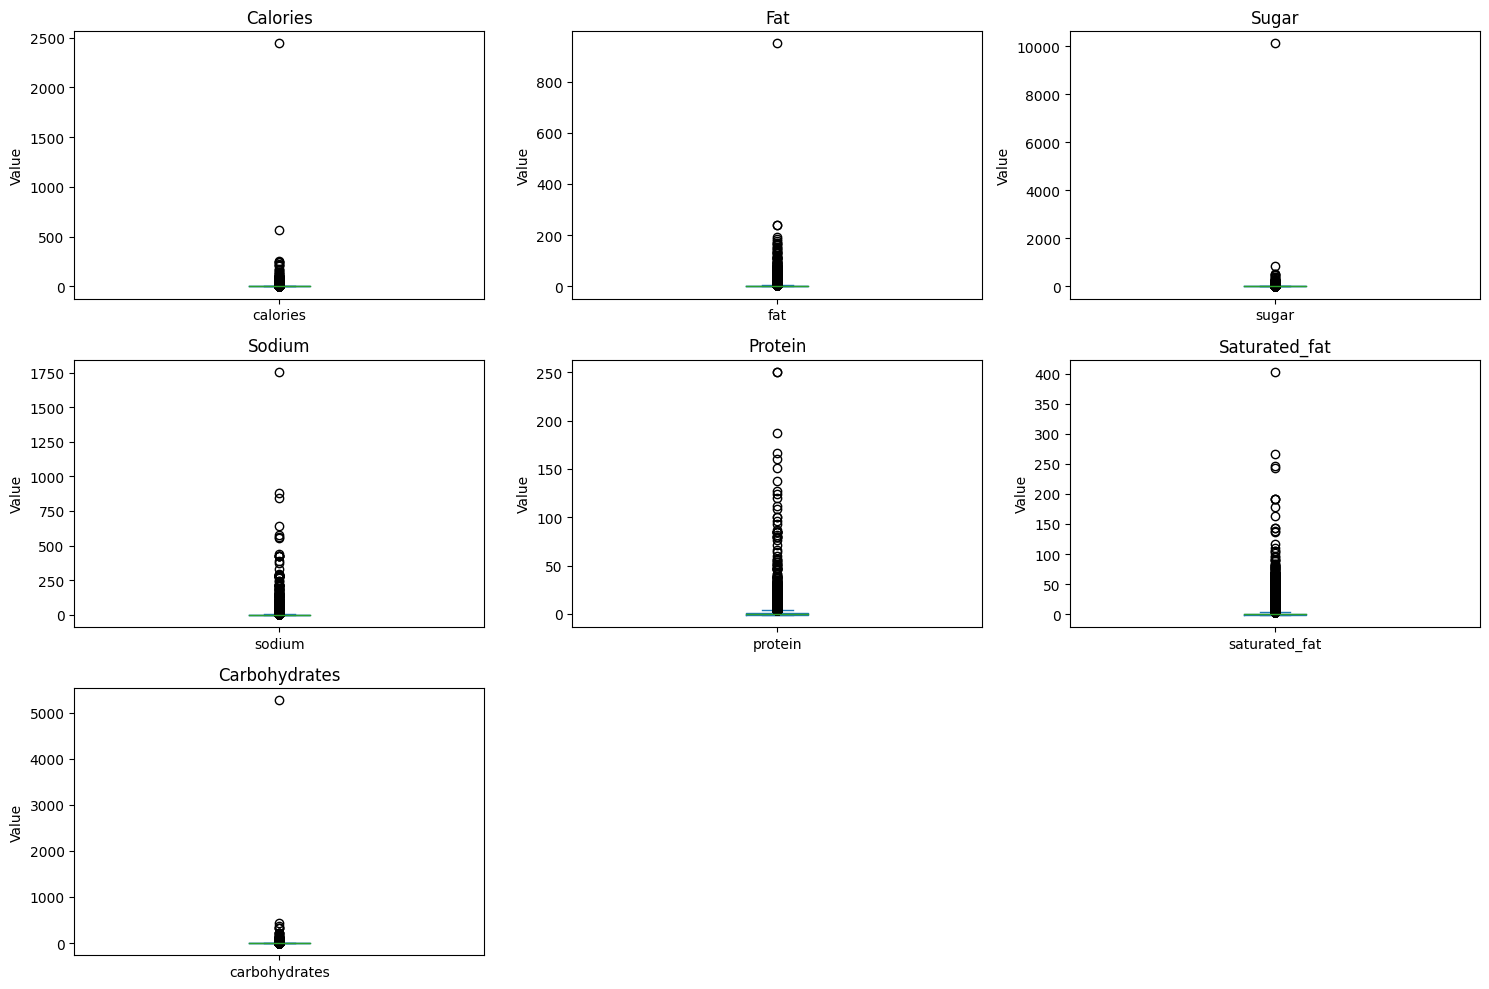

In [30]:
# Create a new DataFrame with scaled nutrition data
df_nutritions_scaled = pd.DataFrame(nutritions_scaled, columns=NUTRITIONS)

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, nutrient in enumerate(NUTRITIONS, 1):
    plt.subplot(3, 3, i)  # Create a subplot for each feature
    df_nutritions_scaled[nutrient].plot(kind='box')
    plt.title(nutrient.capitalize())  # Set feature name as title
    plt.ylabel('Value')

plt.tight_layout()  # Adjust layout to prevent overlapping titles
plt.show()

## Rating info

In [31]:
import pandas as pd
rating_df = pd.read_csv('data/RAW_interactions.csv')
rating_df

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [32]:
rating_df = rating_df.drop(['user_id','date','review'],axis=1)
rating_df.head()

,recipe_id,rating
0,40893,4
1,40893,5
2,44394,4
3,85009,5
4,85009,5


In [33]:
len(rating_df)

1132367

In [34]:
RATING_MEAN_ALL = rating_df['rating'].mean()
RATING_MEAN_ALL

4.411016039852804

In [35]:
grouped_rating_df = rating_df.groupby(['recipe_id'])['rating'].agg(['mean','count'])
grouped_rating_df.reset_index(inplace=True)
grouped_rating_df

,recipe_id,mean,count
0,38,4.250000,4
1,39,3.000000,1
2,40,4.333333,9
3,41,4.500000,2
4,43,1.000000,1
...,...,...,...
231632,537459,5.000000,1
231633,537485,5.000000,1
231634,537543,0.000000,1
231635,537671,0.000000,1


In [36]:
final_df = pd.merge(df, grouped_rating_df, left_on='id', right_on='recipe_id')
final_df.rename(columns={'count': 'votes', 'mean': 'rating'}, inplace=True)
final_df = final_df.drop(['recipe_id'], axis=1)
print(len(df), len(final_df)) # -> Every food_id has at least 1 rating

231637 231637


In [37]:
print(final_df['votes'].describe(), final_df['rating'].describe())

count    231637.000000
mean          4.888541
std          17.532481
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        1613.000000
Name: votes, dtype: float64 count    231637.000000
mean          4.346246
std           0.990806
min           0.000000
25%           4.000000
50%           4.714286
75%           5.000000
max           5.000000
Name: rating, dtype: float64


Transform to workable range

In [38]:
import numpy as np

# Apply log10 transformation to the 'votes' column
votes_LOG10 = np.log10(final_df['votes'])

# Calculate the min and max values of the 'rating' column
min_value = final_df['rating'].min()
max_value = final_df['rating'].max()
# Perform min-max scaling
rating_NORM = (final_df['rating'] - min_value) / (max_value - min_value)

print(votes_LOG10.describe(), rating_NORM.describe())

count    231637.000000
mean          0.381908
std           0.416348
min           0.000000
25%           0.000000
50%           0.301030
75%           0.602060
max           3.207634
Name: votes, dtype: float64 count    231637.000000
mean          0.869249
std           0.198161
min           0.000000
25%           0.800000
50%           0.942857
75%           1.000000
max           1.000000
Name: rating, dtype: float64


In [39]:
votes_MEDIAN = final_df['votes'].median()
rating_MEDIAN = final_df['rating'].median()
votes_LOG10_MEDIAN = votes_LOG10.median()
votes_LOG10_MAX = votes_LOG10.max()
rating_NORM_MEDIAN = rating_NORM.median()
print(votes_MEDIAN, votes_LOG10_MEDIAN, votes_LOG10_MAX, rating_MEDIAN, rating_NORM_MEDIAN)

2.0 0.3010299956639812 3.2076343673889616 4.714285714285714 0.9428571428571428


In [40]:
print(final_df['votes'].quantile(0.9), votes_LOG10.quantile(0.9), final_df['rating'].quantile(0.1), rating_NORM.quantile(0.1))

9.0 0.9542425094393249 3.0 0.6


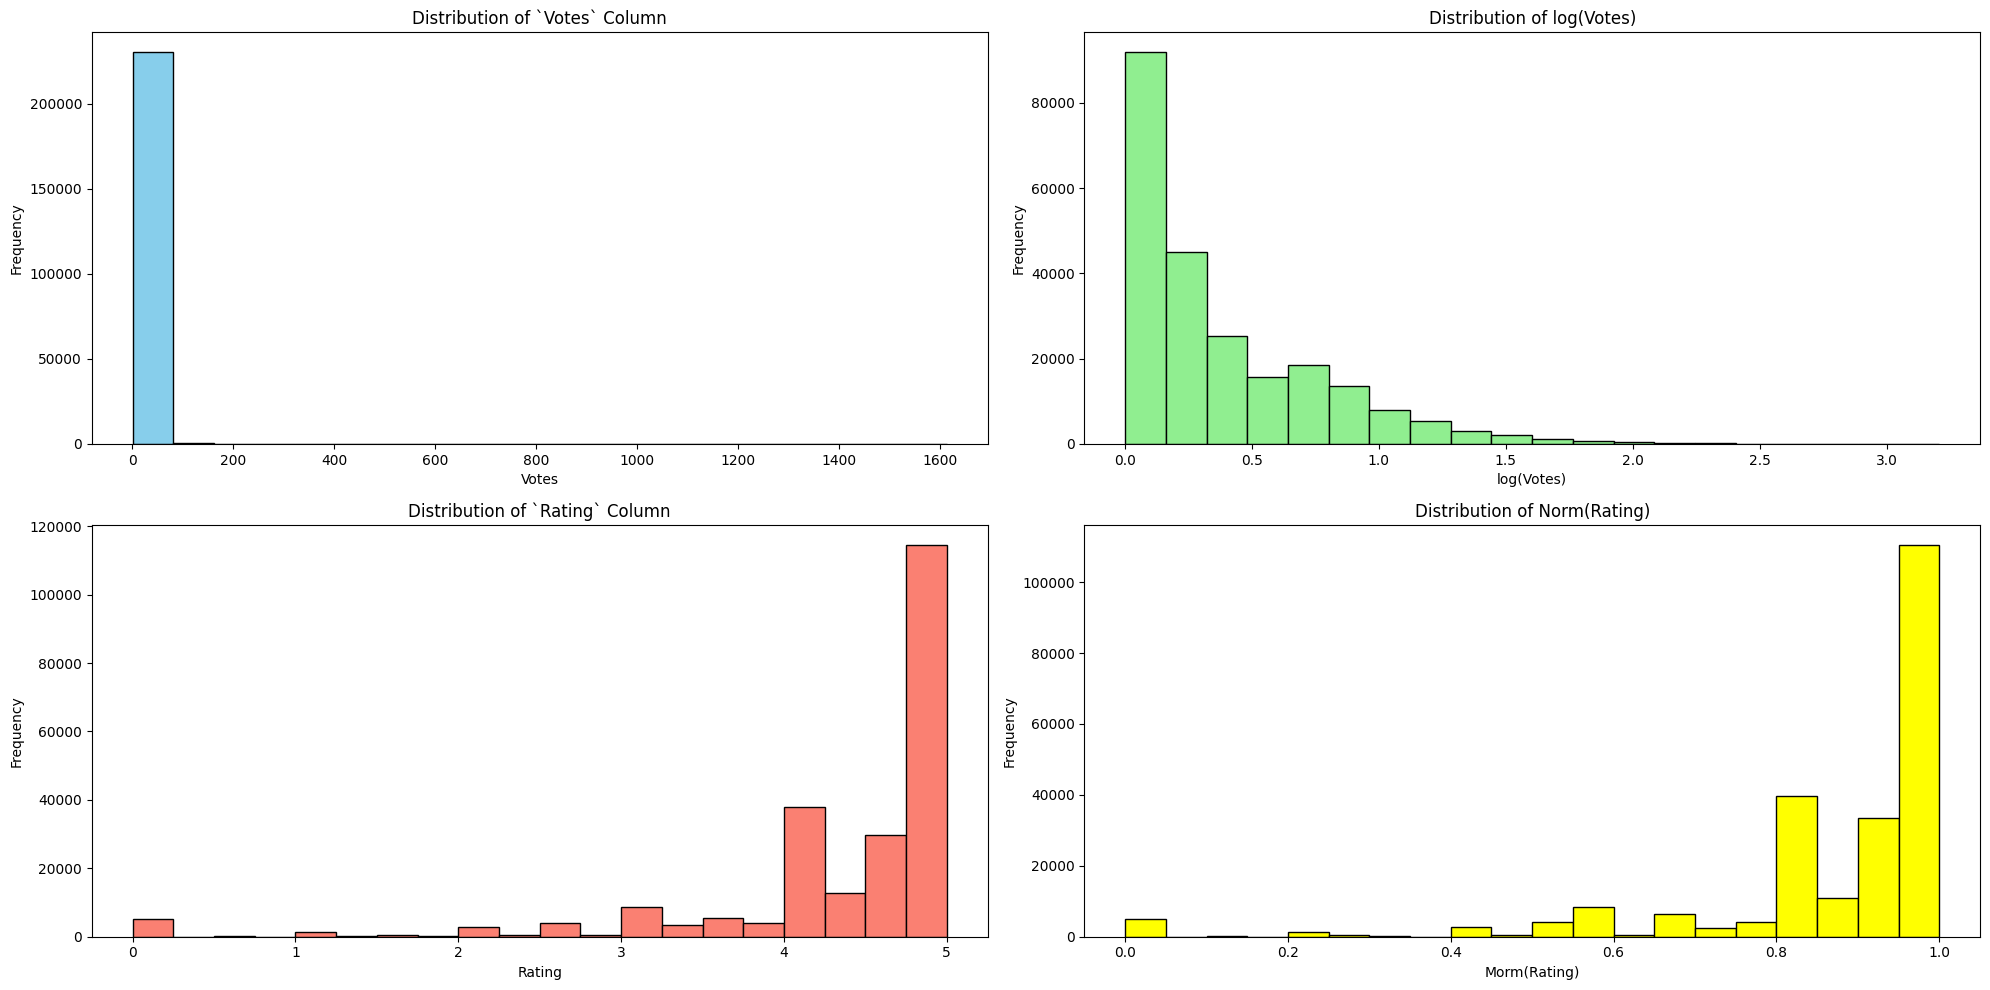

In [41]:
import matplotlib.pyplot as plt

# Create a figure and axis objects with 1 row and 3 columns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))

# Plot histogram of 'count' column
ax1.hist(final_df['votes'], bins=20, color='skyblue', edgecolor='black')
ax1.set_title('Distribution of `Votes` Column')
ax1.set_xlabel('Votes')
ax1.set_ylabel('Frequency')

# Plot histogram of 'std' column
ax2.hist(votes_LOG10, bins=20, color='lightgreen', edgecolor='black')
ax2.set_title('Distribution of log(Votes)')
ax2.set_xlabel('log(Votes)')
ax2.set_ylabel('Frequency')

# Plot histogram of 'mean' column
ax3.hist(final_df['rating'], bins=20, color='salmon', edgecolor='black')
ax3.set_title('Distribution of `Rating` Column')
ax3.set_xlabel('Rating')
ax3.set_ylabel('Frequency')

# Plot histogram of 'mean' column
ax4.hist(rating_NORM, bins=20, color='yellow', edgecolor='black')
ax4.set_title('Distribution of Norm(Rating)')
ax4.set_xlabel('Morm(Rating)')
ax4.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


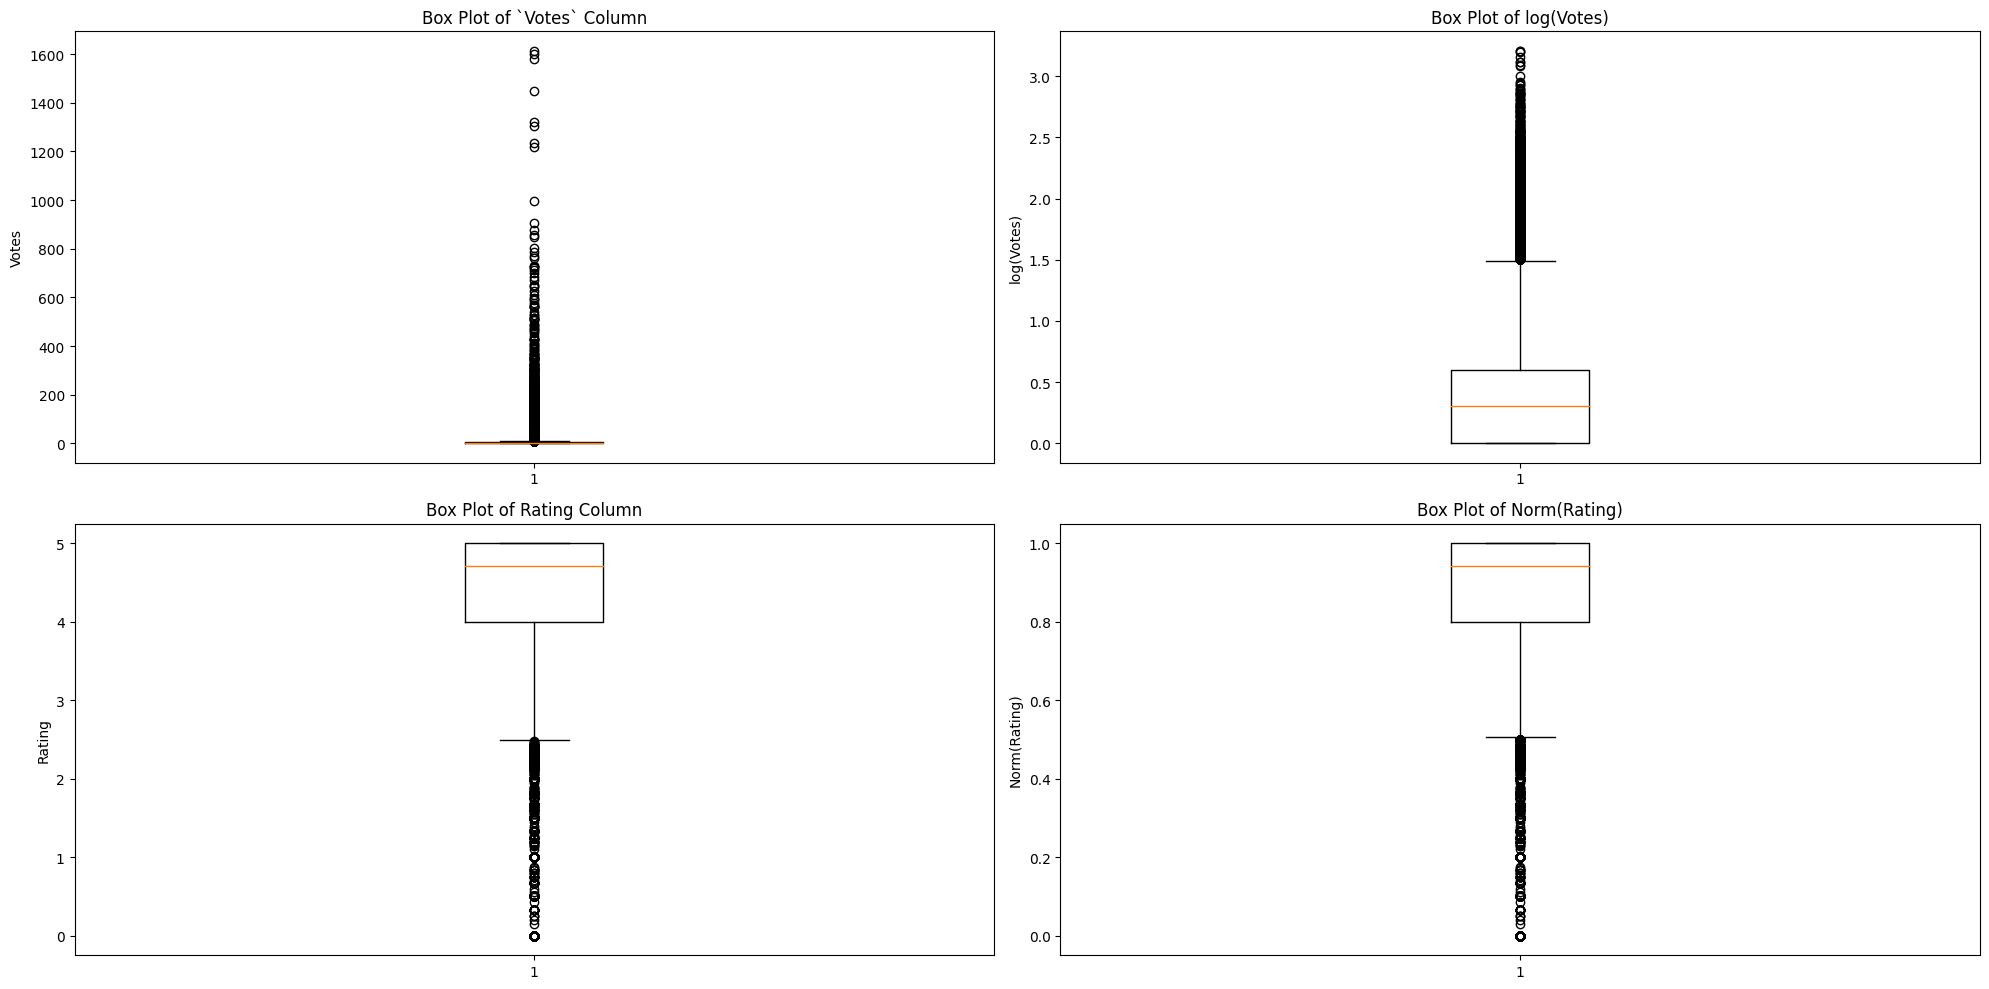

In [42]:
import matplotlib.pyplot as plt

# Create a figure and axis objects
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))

# Plot box plot of 'count' column
ax1.boxplot(final_df['votes'])
ax1.set_title('Box Plot of `Votes` Column')
ax1.set_ylabel('Votes')

# Plot box plot of 'count' column
ax2.boxplot(votes_LOG10)
ax2.set_title('Box Plot of log(Votes)')
ax2.set_ylabel('log(Votes)')

# Plot box plot of 'mean' column
ax3.boxplot(final_df['rating'])
ax3.set_title('Box Plot of Rating Column')
ax3.set_ylabel('Rating')

# Plot box plot of 'mean' column
ax4.boxplot(rating_NORM)
ax4.set_title('Box Plot of Norm(Rating)')
ax4.set_ylabel('Norm(Rating)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [43]:
votes_LOG10_MAX = 3.2076343673889616
def calculate_bonus(columns):
    votes, rating = columns['votes'], columns['rating']
    votes_log10 = np.log10(votes)
    return (rating/5) * (votes_log10/votes_LOG10_MAX)

final_df.loc[:, 'bonus'] = final_df.apply(calculate_bonus, axis=1)

In [44]:
final_df

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,calories,fat,sugar,sodium,protein,saturated_fat,carbohydrates,rating,votes,bonus
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,51.5,0.0,13.0,0.0,2.0,0.0,4.0,5.0,3,0.148746
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"[30-minutes-or-less, time-to-make, course, mai...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,173.4,18.0,0.0,17.0,22.0,35.0,1.0,3.5,4,0.131387
2,all in the kitchen chili,112140,130,196586,2005-02-25,"[time-to-make, course, preparation, main-dish,...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,...,269.8,22.0,32.0,48.0,39.0,27.0,5.0,4.0,1,0.000000
3,alouette potatoes,59389,45,68585,2003-04-14,"[60-minutes-or-less, time-to-make, course, mai...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...",...,368.1,17.0,10.0,2.0,14.0,8.0,20.0,4.5,2,0.084463
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"[weeknight, time-to-make, course, main-ingredi...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,...,352.9,1.0,337.0,23.0,3.0,0.0,28.0,5.0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"[ham, 60-minutes-or-less, time-to-make, course...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,...,415.2,26.0,34.0,26.0,44.0,21.0,15.0,5.0,6,0.242594
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"[15-minutes-or-less, time-to-make, course, pre...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,...,14.8,0.0,2.0,58.0,1.0,0.0,1.0,5.0,1,0.000000
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"[60-minutes-or-less, time-to-make, course, mai...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style",...,59.2,6.0,2.0,3.0,6.0,5.0,0.0,5.0,5,0.217908
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"[30-minutes-or-less, time-to-make, course, pre...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...",...,188.0,11.0,57.0,11.0,7.0,21.0,9.0,1.0,1,0.000000


# Create model

In [45]:
bettermodel = BetterSearchModel(scaler)
bettermodel.load(final_df)
bettermodel.fit(embedded_names, embedded_tags, embedded_ingredients, nutritions_scaled)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[+] Loading data into model...
[+] DONE
[+] Fitting names...
[+] Fitting tags...
[+] Fitting ingredients...
[+] Fitiing nutrition...
[++++] DONE


Prevent run all

In [46]:
assert False

AssertionError: 

## Inference

In [58]:
start_time = time.time()

bettermodel.weights = [
    1.0, # name
    0.5, # tags
    0.8, # ingredients
    0.2, # nutrition
]
bettermodel.weights_rating = 0.5

similar_foods = bettermodel.search(
    name='spring rolls',
    ingredients=['shrimp'],
    tags=['vietnamese'],
    nutrition=[220, 20, 20, 20, 20, 20, 10], # NUTRITIONS = ['calories', 'fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']
    # must_have_tags=True,
    # must_have_all_tags=True,
    rating_important=True,
    k=2000,
    verbose=False
)['df'][:20] # Take 20 most similar

end_time = time.time()

similar_foods

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,name,tags,nutrition,ingredients,total
223517,0.750219,0.167973,0.000000,0.000000,1.108306
210857,0.770499,0.155805,0.000000,0.000000,1.022184
198555,1.000000,0.000000,0.000000,0.000000,1.000000
93703,0.545226,0.181838,0.000000,0.000000,0.952078
102667,0.646098,0.168414,0.000000,0.000000,0.946244
223438,0.685231,0.166366,0.000000,0.000000,0.945445
79229,0.716752,0.168600,0.000000,0.000000,0.932276
73332,0.495813,0.000000,0.000000,0.311462,0.916229
128619,0.507630,0.000000,0.000000,0.332487,0.914489
10746,0.689108,0.168426,0.000000,0.000000,0.904459


In [59]:
bettermodel.data.loc[114493]

name                                          japanese spring rolls
id                                                            84838
minutes                                                          85
contributor_id                                                27678
submitted                                                2004-02-23
tags              [time-to-make, course, main-ingredient, cuisin...
nutrition                   [153.8, 7.0, 3.0, 12.0, 12.0, 7.0, 6.0]
n_steps                                                          10
steps             ['mix the pork , soy sauce , pepper , sugar , ...
description       these crispy treats are easy to make and go ni...
ingredients       [ground pork, soy sauce, pepper, sugar, sake, ...
n_ingredients                                                    11
calories                                                      153.8
fat                                                             7.0
sugar                                           

In [60]:
print(f'Inference time: {end_time-start_time:.2f}s')

Inference time: 0.79s


## Test

In [70]:
import warnings
import statistics
warnings.filterwarnings("ignore", category=UserWarning)

indices = [x for x in range(1000, 105000+1, 5000)]

records = []
for idx in indices:
    recipe_info = final_df.iloc[idx][['name', 'tags', 'ingredients', 'calories', 'fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']]
    N, T, I, *Nt = recipe_info
    start_time = time.time()

    bettermodel.weights = [
        1.0, # name
        0.5, # tags
        0.8, # ingredients
        0.2, # nutrition
    ]
    bettermodel.weights_rating = 0.5

    similar_foods = bettermodel.search(
        name=N,
        ingredients=I,
        tags=T,
        nutrition=Nt,
        must_have_tags=True,
        # must_have_all_tags=True,
        rating_important=True,
        k=1000,
        verbose=False
    )['df'][:10] # Take 10 most similar

    processed_time = time.time() - start_time
    # records.append((recipe_info, similar_foods, processed_time))
    records.append(processed_time)

    print(f'\r{idx}: {processed_time:.3f}s', end='')


101000: 1.142s

In [71]:
#1000
print(f"Mean: {statistics.mean(records)}")
print(f"Std:  {statistics.stdev(records)}")
print(f"Median:  {statistics.median(records)}")

print(f"Min:  {min(records)}")
print(f"Max:  {max(records)}")

Mean: 0.8856758163088844
Std:  0.24650250044994404
Median:  0.7816927433013916
Min:  0.608546257019043
Max:  1.538163423538208


In [69]:
#10000
print(f"Mean: {statistics.mean(records)}")
print(f"Std:  {statistics.stdev(records)}")
print(f"Median:  {statistics.median(records)}")

print(f"Min:  {min(records)}")
print(f"Max:  {max(records)}")

Mean: 1.9803887548900785
Std:  0.7963024315657229
Median:  1.945112943649292
Min:  0.9384033679962158
Max:  3.765080213546753


In [67]:
#5000
print(f"Mean: {statistics.mean(records)}")
print(f"Std:  {statistics.stdev(records)}")
print(f"Median:  {statistics.median(records)}")

print(f"Min:  {min(records)}")
print(f"Max:  {max(records)}")

Mean: 0.9512977259499686
Std:  0.13279632457692342
Median:  0.9173471927642822
Min:  0.7641217708587646
Max:  1.2575600147247314


In [65]:
#2000
print(f"Mean: {statistics.mean(records)}")
print(f"Std:  {statistics.stdev(records)}")
print(f"Median:  {statistics.median(records)}")

print(f"Min:  {min(records)}")
print(f"Max:  {max(records)}")

Mean: 0.9252646327018738
Std:  0.2290512397124101
Median:  0.8593442440032959
Min:  0.7044060230255127
Max:  1.480053186416626


In [ ]:
# for recipe, result, time in records:
#     print(recipe['name'])
#     print(result)
#     for food in result:
#         print(f"\t{food['name']}")
#     print('\t', time)

### End


In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

# # change "/content/gdrive/MyDrive/"  to "/mydrive so you can use directly /mydrive"
# !ln -s /content/gdrive/MyDrive/ /mydrive

In [ ]:
# with open('/content/gdrive/MyDrive/[232] Nomnom WebApp/Embedding/scaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)

In [ ]:
# with open('/content/gdrive/MyDrive/[232] Nomnom WebApp/Embedding/nutrition_scaled.pkl', 'wb') as f:
#     pickle.dump(nutritions_scaled, f)

# Eval

In [ ]:
def show_name(res):
    for i, idx in enumerate(res.index, 1):
        print(i, bettermodel.data.loc[idx]['name'])


In [ ]:
show_name(similar_foods)

In [ ]:
interaction_df = pd.read_csv('data/PP_users.csv')
interaction_df

In [ ]:
interaction_df['items'] = interaction_df['items'].apply(ast.literal_eval)

In [ ]:
for i in range(10):
    ids = interaction_df.loc[i]['items']

    for id in ids[:40]:
        # print(bettermodel.data.loc[bettermodel.data['id'] == id]['name'])
        print(bettermodel.data.loc[id]['name'])
    print('-'*40)

In [ ]:
ids = interaction_df.loc[0]['items']
for id in ids[:10]:
    name = bettermodel.data.loc[id]['name']
    ingredients = bettermodel.data.loc[id]['ingredients']
    tags = bettermodel.data.loc[id]['tags']
    nutrition = list(bettermodel.data.loc[id][NUTRITIONS])

    similar_foods = bettermodel.search(
        name,
        ingredients,
        tags,
        nutrition, # NUTRITIONS = ['calories', 'fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']
        must_have_tags=True,
        # must_have_all_tags=True,
        rating_important=True,
        k=2000
    )['df'][:20] # Take 20 most similar

    print(f"\n{'-'*40} {name} {'-'*40}")
    show_name(similar_foods)

In [ ]:
start_time = time.time()

bettermodel.weights = [
    1.0, # name
    0.5, # tags
    0.8, # ingredients
    0.2, # nutrition
]
bettermodel.weights_rating = 0.5

similar_foods = bettermodel.search(
    name='spring rolls',
    ingredients=['shrimp'],
    tags=['vietnamese'],
    nutrition=[220, 20, 20, 20, 20, 20, 10], # NUTRITIONS = ['calories', 'fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']
    must_have_tags=True,
    # must_have_all_tags=True,
    rating_important=True,
    k=2000
)['df'][:20] # Take 20 most similar

end_time = time.time()

similar_foods

# Instant load and inference model


Prevent Run All

In [ ]:
assert False

# Deploy the NomNom 🌮🍴

In [ ]:
from google.colab import userdata
NGROK_TOKEN = userdata.get('ngrok_token')

In [ ]:
!pip install pyngrok --quiet
!pip install fastapi --quiet

In [ ]:
!ngrok config add-authtoken {NGROK_TOKEN}

In [ ]:
from flask import Flask, request
from functools import reduce
app = Flask(__name__)

@app.post("/recommend")
def recommend_food():
    print(">>> Searching...")
    food_history = request.get_json()["food_history"][:2]
    inference_input = [
        {
            "food_name": food["name"],
            "food_tags": food["tags"],
            "food_nutritions": [food["calories"], food["total_fat"], food["sugar"], food["sodium"], food["protein"], food["saturated_fat"], food["carbohydrates"]]
        }
        for food in food_history]
    food_indices_list = list(map(
        lambda input: set(bettermodel.search(
          name=input["food_name"],
          tags=input["food_tags"],
          ingredients=[""],
          nutrition=input["food_nutritions"], # NUTRITIONS = ['calories', 'fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']
          must_have_tags=False,
          # must_have_all_tags=True,
          rating_important=True,
          k=2000
        )['df'][:20].index),
        inference_input))
    # Filter the recommendations to only common foods
    food_indices = reduce(
        lambda result,indices: result.union(indices),
        food_indices_list[1:],
        food_indices_list[0]
    )
    # similar_foods = bettermodel.search(
    #     name='bun bo',
    #     ingredients=['beef'],
    #     tags=['vietnamese'],
    #     nutrition=[700, 80, 10, 50, 150, 30, 50], # NUTRITIONS = ['calories', 'fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']
    #     must_have_tags=True,
    #     # must_have_all_tags=True,
    #     rating_important=True,
    #     k=2000
    # )['df'][:20] # Take 20 most similar
    print(">>> Done!")

    # similar_foods = bettermodel.search(
    #   name='spaghetti',
    #   ingredients=['beef'],
    #   tags=['italian'],
    #   nutrition=[700, 80, 10, 50, 150, 30, 50], # NUTRITIONS = ['calories', 'fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']
    #   must_have_tags=True,
    #   must_have_all_tags=True,
    #   rating_important=True
    # )['df'][:20] # Take 20 most similar
    # indices = list(similar_foods.index)
    # names = list(bettermodel.data.loc[similar_foods.index, 'name'])

    # return [(index, name) for index, name in zip(indices, names)]
    return list(food_indices)


In [ ]:
from pyngrok import ngrok
import re

ngrok_config = {
    "addr": "5000",
}
public_url = ngrok.connect(**ngrok_config)
print(' * Tunnel URL:', public_url)

url_pattern = r'"(https?://[^"]+)"'
matches = re.findall(url_pattern, str(public_url))
public_link = matches[0]

print(f"Endpoint: {public_link}/recommend")
app.run(host='0.0.0.0', port=5000)

In [ ]:
""" Sample history of user 1:
[
  {
    "name": "white bean   green chile pepper soup",
    "sugar": 9,
    "sodium": 26,
    "food_id": 40893,
    "protein": 24,
    "calories": 204.8,
    "total_fat": 5,
    "description": "easy soup for the crockpot.",
    "carbohydrates": 10,
    "saturated_fat": 2,
    "average_rating": 4.5,
    "tags": [
      "weeknight",
      "time-to-make",
      "course",
      "main-ingredient",
      "preparation",
      "occasion",
      "soups-stews",
      "beans",
      "vegetables",
      "easy",
      "crock-pot-slow-cooker",
      "dietary",
      "equipment"
    ]
  },
  {
    "name": "devilicious cookie cake delights",
    "sugar": 39,
    "sodium": 5,
    "food_id": 44394,
    "protein": 4,
    "calories": 132.3,
    "total_fat": 11,
    "description": null,
    "carbohydrates": 5,
    "saturated_fat": 11,
    "average_rating": 4,
    "tags": [
      "30-minutes-or-less",
      "time-to-make",
      "course",
      "main-ingredient",
      "preparation",
      "occasion",
      "for-large-groups",
      "5-ingredients-or-less",
      "drop-cookies",
      "desserts",
      "lunch",
      "oven",
      "easy",
      "potluck",
      "fall",
      "finger-food",
      "heirloom-historical",
      "holiday-event",
      "kid-friendly",
      "picnic",
      "spring",
      "summer",
      "winter",
      "cakes",
      "cookies-and-brownies",
      "easter",
      "chocolate",
      "dietary",
      "gifts",
      "christmas",
      "hanukkah",
      "new-years",
      "seasonal",
      "comfort-food",
      "independence-day",
      "ramadan",
      "rosh-hashana",
      "valentines-day",
      "taste-mood",
      "to-go",
      "equipment",
      "number-of-servings",
      "presentation"
    ]
  },
  {
    "name": "baked potato toppings",
    "sugar": 134,
    "sodium": 290,
    "food_id": 85009,
    "protein": 161,
    "calories": 2786.2,
    "total_fat": 342,
    "description": "these toppings sure makes a nice change from plain old sour cream and bacon bits.you can use regular, light, fat free, or calorie reduced mayonnaise.",
    "carbohydrates": 42,
    "saturated_fat": 301,
    "average_rating": 5,
    "tags": [
      "15-minutes-or-less",
      "time-to-make",
      "course",
      "main-ingredient",
      "preparation",
      "condiments-etc",
      "vegetables",
      "easy",
      "inexpensive",
      "number-of-servings",
      "3-steps-or-less"
    ]
  },
  {
    "name": "kfc honey bbq strips",
    "sugar": 40,
    "sodium": 37,
    "food_id": 134728,
    "protein": 78,
    "calories": 316,
    "total_fat": 4,
    "description": "these are so yummy and they do taste just like kfc's honey bbq strips. enjoy!!",
    "carbohydrates": 10,
    "saturated_fat": 4,
    "average_rating": 3.8,
    "tags": [
      "60-minutes-or-less",
      "time-to-make",
      "main-ingredient",
      "preparation",
      "healthy",
      "poultry",
      "low-fat",
      "chicken",
      "dietary",
      "low-saturated-fat",
      "high-protein",
      "high-in-something",
      "low-in-something",
      "meat"
    ]
  }
]
"""